Closed-form solution:
Intercept: 3.1052, Slope: 3.9844

Gradient Descent solution:
Intercept: 3.1052, Slope: 3.9844


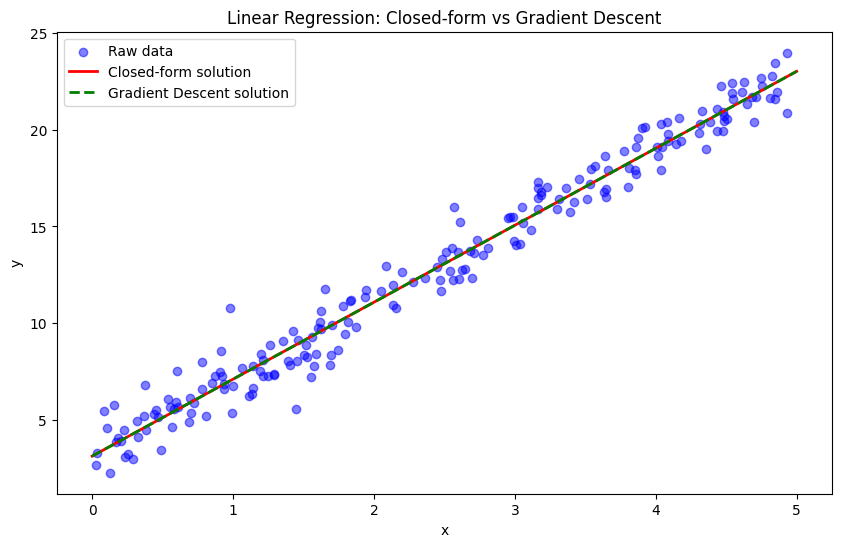

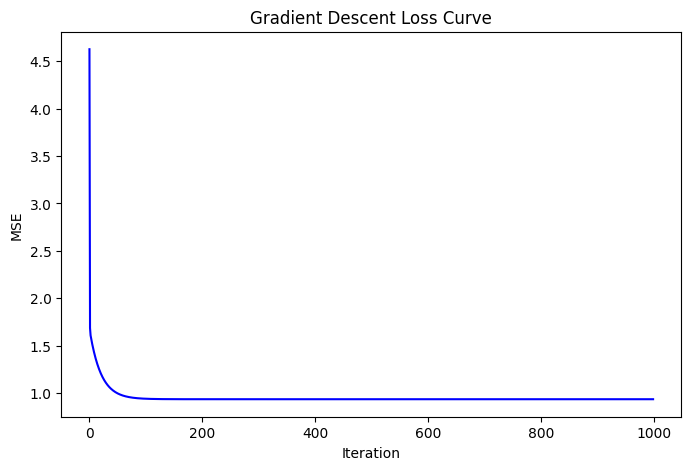


Explanation:
Both the closed-form and gradient descent solutions converge to very similar intercept and slope values. The loss curve shows smooth convergence, confirming that gradient descent found the optimal solution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic dataset
np.random.seed(42)  # for reproducibility
n_samples = 200
X = np.random.uniform(0, 5, n_samples).reshape(-1, 1)
epsilon = np.random.normal(0, 1, n_samples)  # Gaussian noise
y = 3 + 4 * X.flatten() + epsilon

# Add bias term (intercept column of 1s)
X_b = np.c_[np.ones((n_samples, 1)), X]

# ------------------------------------------------------------
# 2. Closed-form solution (Normal Equation)
theta_closed = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
intercept_closed, slope_closed = theta_closed
print("Closed-form solution:")
print(f"Intercept: {intercept_closed:.4f}, Slope: {slope_closed:.4f}")

# ------------------------------------------------------------
# 3. Gradient Descent Implementation
def compute_mse(X, y, theta):
    predictions = X @ theta
    errors = predictions - y
    return (1/len(y)) * np.dot(errors, errors)

# Hyperparameters
eta = 0.05   # learning rate
n_iterations = 1000
theta_gd = np.zeros(2)  # [intercept, slope]

mse_history = []
for i in range(n_iterations):
    gradients = (2/len(y)) * X_b.T @ (X_b @ theta_gd - y)
    theta_gd -= eta * gradients
    mse_history.append(compute_mse(X_b, y, theta_gd))

intercept_gd, slope_gd = theta_gd
print("\nGradient Descent solution:")
print(f"Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

# ------------------------------------------------------------
# 4. Visualization

# Plot raw data and fitted lines
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Raw data")

x_line = np.linspace(0, 5, 100)
y_closed = intercept_closed + slope_closed * x_line
y_gd = intercept_gd + slope_gd * x_line

plt.plot(x_line, y_closed, "r-", linewidth=2, label="Closed-form solution")
plt.plot(x_line, y_gd, "g--", linewidth=2, label="Gradient Descent solution")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Closed-form vs Gradient Descent")
plt.legend()
plt.show()

# Plot loss curve for Gradient Descent
plt.figure(figsize=(8,5))
plt.plot(range(n_iterations), mse_history, "b-")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve")
plt.show()

# ------------------------------------------------------------
# 5. Explanation
print("\nExplanation:")
print("Both the closed-form and gradient descent solutions converge to very similar intercept "
      "and slope values. The loss curve shows smooth convergence, confirming that gradient "
      "descent found the optimal solution.")